In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
from scipy import integrate as intg

one = np.eye(2,dtype=complex)
tau1 = np.array([ [0.j,1.],[1.,0.j]],dtype=complex)
tau2 = np.array([[0.,-1.j],[1.j,0.]],dtype=complex)
tau3 = -1.j*tau1@tau2

In [2]:
def H(p,mu,tperp,tpar,B):
    return -mu*one - tperp*tau1 - 2.*tpar*np.cos( p - 0.5*B*tau3 )

def nel(h,t):
    return np.linalg.inv(np.exp(h/t)+one)

def nho(h,t):
    return np.linalg.inv(np.exp(-h/t)+one)

def integrand(p,q,t,mu,tperp,tpar,B):
    h1 = H(p-q/2,mu,tperp,tpar,B)
    h2 = H(p+q/2,mu,tperp,tpar,B)
    
    n1 = nel(h1,t)
    n2 = nho(h2,t)
    
    return np.trace(n1@tau2@n2@tau2)

def PiHall(q,t,mu,tperp,tpar,B):
    
    
    return intg.quad(integrand,)

In [3]:
tperp = 0.3
tpar = 1.
mu = 0.4
B = 0.5

nump = 100
p = np.linspace(-np.pi,np.pi,nump)
Es = np.zeros((2,nump))

for i in range(nump):
    h = H(p[i],mu,tperp,tpar,B)
    eigs = np.linalg.eigh(h)[0]
    Es[:,i] = np.real(eigs)
    


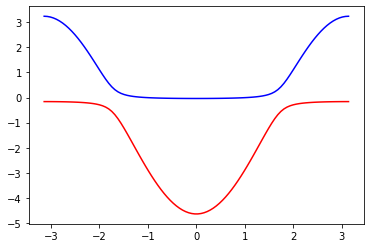

In [4]:
plt.plot(p,Es[0,:],color='red')
plt.plot(p,Es[1,:],color='blue')
plt.show()